In [1]:
import pandas as pd

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ... (código anterior para ler o dataset 'vinhos') ...

# Define X (features) e y (target)
X = vinhos.drop('classe', axis=1)  # Remove a coluna 'classe' para obter as features
y = vinhos['classe']   # Define a coluna 'classe' como o target

# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assumindo que X_train, X_test, y_train, y_test já estão definidos

# KNN com k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Acurácia para k=3:", accuracy_3)

# KNN com k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
accuracy_5 = accuracy_score(y_test, y_pred_5)
print("Acurácia para k=5:", accuracy_5)

# Comparação
if accuracy_3 > accuracy_5:
    print("O modelo com k=3 apresentou melhor desempenho.")
elif accuracy_5 > accuracy_3:
    print("O modelo com k=5 apresentou melhor desempenho.")
else:
    print("Ambos os modelos apresentaram a mesma acurácia.")

Acurácia para k=3: 0.7407407407407407
Acurácia para k=5: 0.7407407407407407
Ambos os modelos apresentaram a mesma acurácia.


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Função para treinar e avaliar o modelo
def evaluate_knn(X_train, X_test, y_train, y_test, k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

# Valores de random_state
random_states = [17, 24]
k_values = [3, 5]

# Loop para cada random_state
for random_state in random_states:
  # Dividir os dados
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

  print(f"Resultados para random_state={random_state}")
  for k in k_values:
    accuracy = evaluate_knn(X_train, X_test, y_train, y_test, k)
    print(f"  Acurácia para k={k}: {accuracy:.2f}")

Resultados para random_state=17
  Acurácia para k=3: 0.65
  Acurácia para k=5: 0.67
Resultados para random_state=24
  Acurácia para k=3: 0.74
  Acurácia para k=5: 0.67


   random_state  k  accuracy  precision    recall        f1
0            42  3  0.740741   0.744753  0.740741  0.742407
1            42  5  0.740741   0.744753  0.740741  0.742407
2            17  3  0.648148   0.637981  0.648148  0.614868
3            17  5  0.666667   0.666049  0.666667  0.631002
4            24  3  0.740741   0.742047  0.740741  0.738780
5            24  5  0.666667   0.636977  0.666667  0.645813


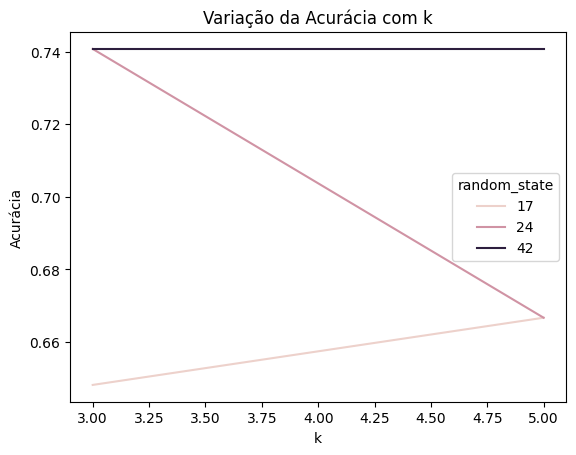

In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Função para treinar e avaliar o modelo
def evaluate_knn(X_train, X_test, y_train, y_test, k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  return accuracy, precision, recall, f1

# Lista para armazenar os resultados
results = []

# Valores de random_state e k
random_states = [42, 17, 24]
k_values = [3, 5]

# Loop para cada combinação de random_state e k
for random_state in random_states:
  for k in k_values:
    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Avaliar o modelo
    accuracy, precision, recall, f1 = evaluate_knn(X_train, X_test, y_train, y_test, k)
    results.append([random_state, k, accuracy, precision, recall, f1])

# DataFrame com os resultados
df_results = pd.DataFrame(results, columns=['random_state', 'k', 'accuracy', 'precision', 'recall', 'f1'])

# Imprimir tabela
print(df_results)

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de linha para visualizar a variação da acurácia com k
sns.lineplot(data=df_results, x='k', y='accuracy', hue='random_state')
plt.title('Variação da Acurácia com k')
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.show()